<a href="https://colab.research.google.com/github/gunnarsc/aula2/blob/main/Experimento_de_Monty_Hall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de Monty Hall

Disciplina de Processos Estocásticos - 
Gunnar S. Comoreto - 
UFSM 2021-1

Neste Problema de Monty Hall, parte=imos do princípio que você tem 4 opções de escolha (quatro portas, nesse caso) e que alguém (um apresentador) pede que você escolha uma das portas, pois em uma delas há um prêmio. Após fazer sua escolha, o apresentador remove uma das portas que não contém o prêmio (ele sabe o que há em todas as portas previamente), e ele pergunta se você tem vontade de trocar de porta (agora você tem apenas três escolhas). Dessa forma, analizando do princípio, você tinha 1/4 de chance (25%) de ganhar o prêmio, e 3/4 de chance de perder o prêmio. 
  Após a remoção de uma das portas (não premiada) o que podemos imaginar é que agora, suas chances são de 33%, já que há apenas três portas disponíveis. Mas o que acontece na verdade, é que a porta que você escolheu inicialmente tem os mesmos 1/4 de chance, enquanto as portas que sobraram continuam com os 3/4 de chance. Dessa forma, você tem 3/4 de chance entre duas portar, portanto 3/4 * 1/5, assim você possui 3/8 de chance de ganhar trocando, e 3/8 de cahance de perder trocando.
  
  Se você tivesse escolhido a porta certa para começar, perderia mudando. No entanto, isso ocorrerá apenas 1/4 das vezes. Então, 1/4 das vezes você vai ganhar ficando.
Em seguida, show abre uma porta com uma cabra -
3/4 das vezes, você escolherá uma porta com uma cabra para começar. A revelação de uma cabra faz com que 3/4 das vezes as 2 portas restantes tenham o prêmio! Mas espere, agora é pura sorte, bom e velho 50/50. Portanto, sua chance de ganhar neste caso será de (3/4) * (1/2) ou 3/8.

Portanto, em geral, suas três opções: há 2/8 (1/4) de chance de ganhar sem mudar, 3/8 de chance de perder mudando (movendo-se para digamos a porta x) e 3/8 de chance de ganhar de mudando (digamos, movendo para a porta y).
  Este programa abaixo, tem como objetivo simular este experimento alternativo do problema de Monty Hall.





In [187]:
#simulação do experimento de Monty Hall com quatro portas
#Atividade da disciplina de Processos Estocásticos
#Gunnar S. Comoreto
#UFSM 2021-1

import numpy as np
import random
import matplotlib.pyplot as plt

#função para simular o apresentador sabendo qual porta tirar
def porta_sem_premio (apresentador, n_portas, escolha_jogador): 
  i = 1 
  while (i == apresentador or i == escolha_jogador): 
    i = (i + 1)% (n_portas) 
  
  return i

#função para simular o jogador mudando de porta
def troca_porta (mostra_porta, n_portas, escolha_jogador): 
  i = 1 
  while (i == mostra_porta or i == escolha_jogador): 
    i = (i + 1)% (n_portas) 
  
  return i


 #inicia o jogo 
def jogo_de_monty_hall(troca, n_teste):
  vitoria_trocax_cnt = 0
  vitoria_sem_troca_cnt = 0
  perda_trocax_cnt = 0
  perda_sem_troca_cnt = 0
  vitoria_trocay_cnt = 0
  perda_trocay_cnt = 0
  portas = [0,1,2,3]
  n_portas = len(portas)
  
  
  for i in range(0,n_teste):
    porta_premiada = random.randint(0, n_portas-1) #escolhe aleatóriamente a porta com o prêmio
    apresentador = porta_premiada #o apresentador escolhe a porta premiada
    
    #o jogador escolhe alearóriamente a porta que ele acredita estar com o prêmio
    escolha_jogador = random.randint(0, n_portas-1)
    escolha_inicial_jogador = escolha_jogador
    mostra_porta = porta_sem_premio (apresentador, n_portas, escolha_jogador)
    #mostra_porta2 = porta_sem_premio (apresentador, n_portas, escolha_jogador)
    
    if troca == True:
      troca_porta (mostra_porta,n_portas, escolha_jogador)
                                            
    if escolha_jogador == apresentador and troca == False:
      #ganha por não trocar
      print('Jogador ganha sem trocar de porta - O jogador escolheu a porta: ', escolha_jogador,' Escolha inicial: ',escolha_inicial_jogador ,', Porta com prêmio:', porta_premiada, ', Mostra porta: ',mostra_porta )
      vitoria_sem_troca_cnt = vitoria_sem_troca_cnt + 1
    elif escolha_jogador == apresentador and troca == True:
      #ganha por trocar para porta x
      print('Jogador ganha trocando de porta - O jogador escolheu a porta: ', escolha_jogador,' Escolha inicial: ',escolha_inicial_jogador , ', Porta com prêmio:', porta_premiada, ', Mostra porta: ',mostra_porta )
      vitoria_trocax_cnt = vitoria_trocax_cnt +1
    elif escolha_jogador != apresentador and troca == False:
      #perde por não trocar
      print('Jogador perde sem trocar de porta - O jogador escolheu a porta: ', escolha_jogador,' Escolha inicial: ',escolha_inicial_jogador , ', Porta com prêmio:', porta_premiada, ', Mostra porta: ',mostra_porta )
      perda_sem_troca_cnt = perda_sem_troca_cnt + 1
    elif escolha_jogador != apresentador and troca == True:
      #perde por trocar para a porta x
      print('Jogador perde trocando de porta - O jogador escolheu a porta: ', escolha_jogador,' Escolha inicial: ',escolha_inicial_jogador , ', Porta com prêmio:', porta_premiada, ', Mostra porta: ',mostra_porta )
      perda_trocax_cnt = perda_trocax_cnt + 1
    elif escolha_jogador == apresentador and troca == True:
      #ganha por trocar para porta y
      print('Jogador ganha trocando de porta - O jogador escolheu a porta: ', escolha_jogador,' Escolha inicial: ',escolha_inicial_jogador , ', Porta com prêmio:', porta_premiada, ', Mostra porta: ',mostra_porta )
      vitoria_trocay_cnt = vitoria_trocay_cnt +1  
    elif escolha_jogador != apresentador and troca == True:
      #perde por trocar para a porta y
      print('Jogador perde trocando de porta - O jogador escolheu a porta: ', escolha_jogador,' Escolha inicial: ',escolha_inicial_jogador , ', Porta com prêmio:', porta_premiada, ', Mostra porta: ',mostra_porta )
      perda_trocay_cnt = perda_trocay_cnt + 1
    else:
      print('ERRO')

  return vitoria_sem_troca_cnt,vitoria_trocax_cnt,perda_sem_troca_cnt,perda_trocax_cnt, vitoria_trocay_cnt, perda_trocay_cnt, n_teste




In [211]:
#teste do problema, apresentando a porta escolhida, a porta de troca, a porta com prêmio e a porta removida pelo apresentador

import numpy as np
import random
import matplotlib.pyplot as plt



x = jogo_de_monty_hall (True, 10)

#print('Vitórias por trocar x %: ', x[0]/ x[6])
#print('Perdas por trocar x %: ', x[2]/ x[6])
print('Vitórias sem trocar %: ', x[1]/ x[6])
print('Perdas sem trocar %: ', x[3]/ x[6])
#print('Vitórias por trocar y %: ', x[4]/ x[6])
#print('Perdas por trocar y %: ', x[5]/ x[6])



Jogador perde trocando de porta - O jogador escolheu a porta:  3  Escolha inicial:  3 , Porta com prêmio: 0 , Mostra porta:  1
Jogador perde trocando de porta - O jogador escolheu a porta:  2  Escolha inicial:  2 , Porta com prêmio: 1 , Mostra porta:  3
Jogador ganha trocando de porta - O jogador escolheu a porta:  0  Escolha inicial:  0 , Porta com prêmio: 0 , Mostra porta:  1
Jogador perde trocando de porta - O jogador escolheu a porta:  1  Escolha inicial:  1 , Porta com prêmio: 3 , Mostra porta:  2
Jogador ganha trocando de porta - O jogador escolheu a porta:  0  Escolha inicial:  0 , Porta com prêmio: 0 , Mostra porta:  1
Jogador ganha trocando de porta - O jogador escolheu a porta:  0  Escolha inicial:  0 , Porta com prêmio: 0 , Mostra porta:  1
Jogador perde trocando de porta - O jogador escolheu a porta:  2  Escolha inicial:  2 , Porta com prêmio: 3 , Mostra porta:  1
Jogador ganha trocando de porta - O jogador escolheu a porta:  0  Escolha inicial:  0 , Porta com prêmio: 0 , M

In [210]:
#dados para verificação gráfica

n_teste = []
percentual_de_vitoria = []
troca = True
for i in range(1,51):
  n_teste.append(i) 
  y = jogo_de_monty_hall (troca, i) 
  percentual_de_vitoria.append(y[1]/ y[6]) 

Jogador perde trocando de porta - O jogador escolheu a porta:  3  Escolha inicial:  3 , Porta com prêmio: 2 , Mostra porta:  1
Jogador perde trocando de porta - O jogador escolheu a porta:  3  Escolha inicial:  3 , Porta com prêmio: 0 , Mostra porta:  1
Jogador perde trocando de porta - O jogador escolheu a porta:  1  Escolha inicial:  1 , Porta com prêmio: 3 , Mostra porta:  2
Jogador ganha trocando de porta - O jogador escolheu a porta:  1  Escolha inicial:  1 , Porta com prêmio: 1 , Mostra porta:  2
Jogador perde trocando de porta - O jogador escolheu a porta:  1  Escolha inicial:  1 , Porta com prêmio: 0 , Mostra porta:  2
Jogador perde trocando de porta - O jogador escolheu a porta:  3  Escolha inicial:  3 , Porta com prêmio: 0 , Mostra porta:  1
Jogador perde trocando de porta - O jogador escolheu a porta:  1  Escolha inicial:  1 , Porta com prêmio: 2 , Mostra porta:  3
Jogador ganha trocando de porta - O jogador escolheu a porta:  3  Escolha inicial:  3 , Porta com prêmio: 3 , M

# Nova seção

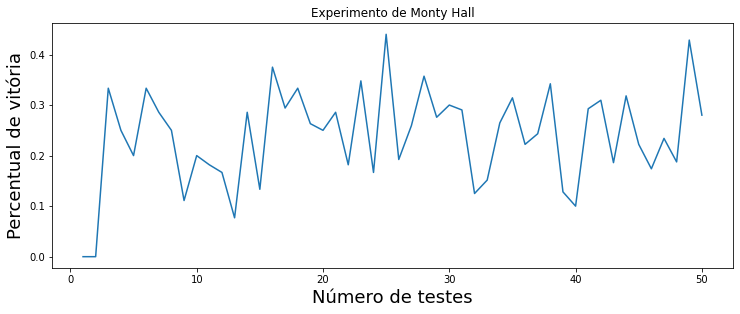

In [212]:
#verificação gráfica

plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( n_teste, percentual_de_vitoria  )
plt.title('Experimento de Monty Hall')
plt.xlabel('Número de testes',fontsize=18)
plt.ylabel('Percentual de vitória',fontsize=18)
plt.show()